## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

1. Memastikan jumlah data setiap label angka (0-9)

Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


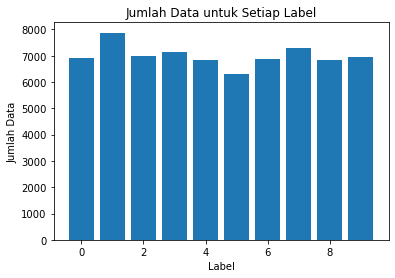

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Mengambil label dan fitur dari dataset (asumsi Anda telah memuat dataset MNIST sebelumnya)
X = mnist.data
y = mnist.target

# Menghitung jumlah data untuk setiap label
label_counts = np.bincount(y.astype(int))

# Menampilkan jumlah data untuk setiap label
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count} data")

# Membuat diagram batang
plt.bar(range(len(label_counts)), label_counts)
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data untuk Setiap Label')
plt.show()

Membuktikan Data Imbalance

In [6]:
import numpy as np

# Mengambil label dari dataset (asumsi Anda telah memuat dataset MNIST sebelumnya)
y = mnist.target

# Menghitung jumlah data total
total_data = len(y)

# Menghitung jumlah data untuk setiap label
label_counts = np.bincount(y.astype(int))

# Menampilkan presentase jumlah data untuk setiap label
for label, count in enumerate(label_counts):
    percentage = (count / total_data) * 100
    print(f"Label {label}: {count} data ({percentage:.2f}%) dari total")

Label 0: 6903 data (9.86%) dari total
Label 1: 7877 data (11.25%) dari total
Label 2: 6990 data (9.99%) dari total
Label 3: 7141 data (10.20%) dari total
Label 4: 6824 data (9.75%) dari total
Label 5: 6313 data (9.02%) dari total
Label 6: 6876 data (9.82%) dari total
Label 7: 7293 data (10.42%) dari total
Label 8: 6825 data (9.75%) dari total
Label 9: 6958 data (9.94%) dari total


2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya

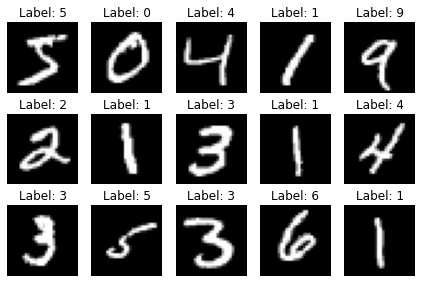

In [7]:
import matplotlib.pyplot as plt

# Menampilkan 15 gambar pertama dengan labelnya
fig, axes = plt.subplots(3, 5)
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist.data.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {mnist.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

3. Ekstraksi Fitur Menggunakan PCA

Melakukan ekstraksi fitur menggunakan PCA. PCA adalah teknik untuk mengurangi dimensi data dengan memproyeksikan data ke ruang berdimensi lebih rendah. Dalam konteks MNIST, Anda dapat menggunakan PCA untuk mengurangi dimensi dari 784 fitur menjadi sejumlah komponen utama yang lebih kecil. Berikut adalah contoh bagaimana Anda dapat melakukan ekstraksi fitur menggunakan PCA.

In [8]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA #reduksi dimensi
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

4. Membuat data training dan data testing menggunakan rasio 70:30

In [9]:
# Split data menjadi data training (70%) dan data testing (30%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

5. Lakukan proses klasifikasi dengan menggunakan SVM.

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Definisikan grid parameter untuk pencarian parameter terbaik
param_grid = {'svc__C': [1, 10, 100],
              'svc__gamma': [0.0001, 0.001, 0.01]}

# Inisiasi GridSearchCV
grid = GridSearchCV(model, param_grid, cv=3)  # cv adalah jumlah lipatan dalam validasi silang

# Melatih model dengan GridSearchCV
grid.fit(X_train, y_train)

# Menampilkan hasil parameter terbaik dan akurasi terbaik
print("Parameter terbaik:", grid.best_params_)
print("Akurasi terbaik:", grid.best_score_)

Parameter terbaik: {'svc__C': 10, 'svc__gamma': 0.01}
Akurasi terbaik: 0.969428568487714


Membuat Model

In [11]:
model = grid.best_estimator_
yfit = model.predict(X_test)

6. Evaluasi model terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.

In [24]:
from sklearn.metrics import classification_report

# Menambahkan fungsi classification_report untuk data testing
report_test = classification_report(y_test, yfit, target_names=[str(i) for i in range(10)])

print("\nClassification Report untuk Data Testing:")
print(report_test)


Classification Report untuk Data Testing:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2058
           1       0.99      0.99      0.99      2364
           2       0.95      0.98      0.96      2133
           3       0.98      0.96      0.97      2176
           4       0.97      0.98      0.97      1936
           5       0.97      0.97      0.97      1915
           6       0.98      0.98      0.98      2088
           7       0.98      0.97      0.97      2248
           8       0.95      0.98      0.97      1992
           9       0.97      0.96      0.97      2090

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



Confusion Matrix

Text(91.68, 0.5, 'predicted label')

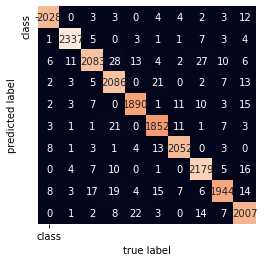

In [25]:
import seaborn as sns
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [36]:
X_test_np = X_test.to_numpy()  # Mengubah DataFrame menjadi array NumPy


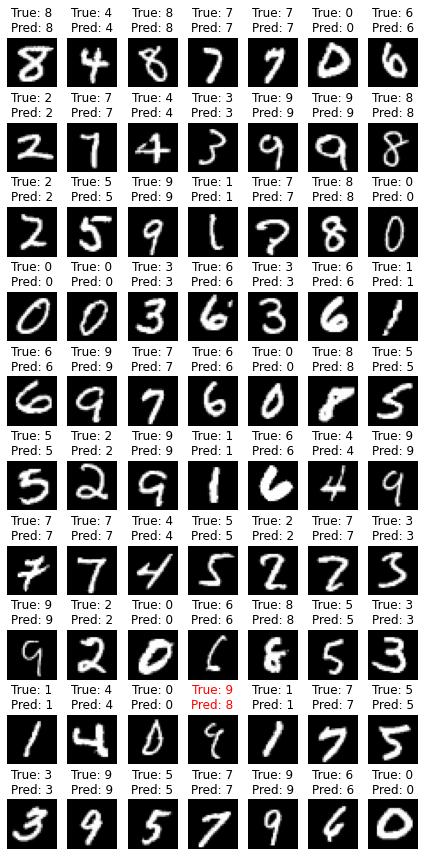

In [44]:
import pandas as pd

n_samples_to_display = 70
# Display images with true labels and predicted labels
plt.figure(figsize=(6, 12))
for i in range(n_samples_to_display):
    plt.subplot(10, 7, i + 1)
    plt.imshow(X_test_np[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = yfit.iloc[i] if isinstance(yfit, pd.Series) else yfit[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [35]:
X_test[i].shape

KeyError: 0

In [22]:
print(len(X_test))
print(len(y_test))
print(len(yfit))


21000
21000
21000


80:20